In [1]:
from nuscenes.nuscenes import NuScenes

nuscenes_dataset = NuScenes(version="v1.0-trainval", dataroot="/workspace/BEVFormer/data/nuscenes", verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 53.882 seconds.
Reverse indexing ...
Done reverse indexing in 10.2 seconds.


In [260]:
from PIL import Image

def combine_images(image_paths):
    # Open images
    images = [Image.open(path) for path in image_paths]

    # Get dimensions of the first image
    width, height = images[0].size

    # Create a new image with the combined size
    combined_image = Image.new("RGB", (width * 3, height * 2))

    # Paste each image into the combined image
    for i in range(6):
        x = (i % 3) * width
        y = (i % 2) * height
        combined_image.paste(images[i], (x, y))

    combined_image = combined_image.resize((1200, 450))
    return combined_image

def get_multiview_image_paths(dataset, sample_token):
    sample = dataset.get("sample", sample_token)
    return [
        dataset.get_sample_data(sample["data"]["CAM_FRONT_LEFT"])[0],
        dataset.get_sample_data(sample["data"]["CAM_BACK"])[0],
        dataset.get_sample_data(sample["data"]["CAM_FRONT_RIGHT"])[0],
        dataset.get_sample_data(sample["data"]["CAM_BACK_RIGHT"])[0],
        dataset.get_sample_data(sample["data"]["CAM_FRONT"])[0],
        dataset.get_sample_data(sample["data"]["CAM_BACK_LEFT"])[0],
    ]


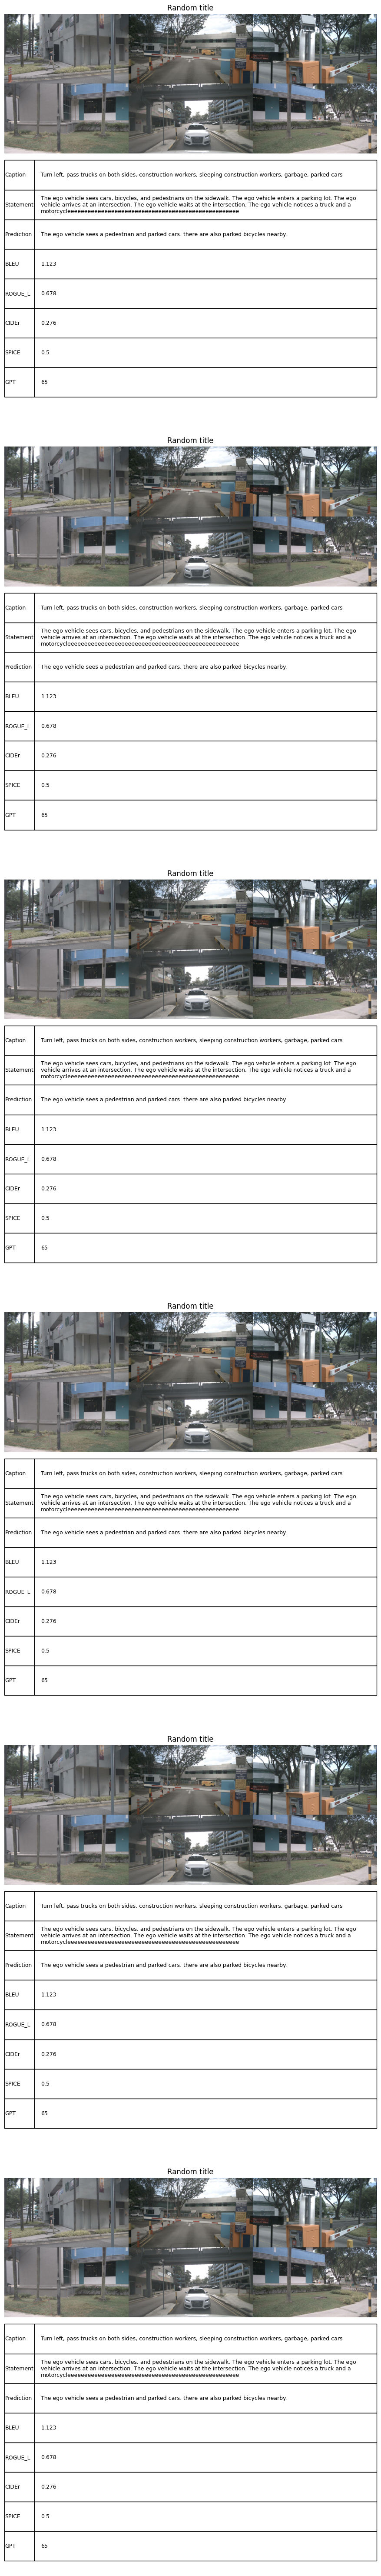

In [261]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

def wrap_text(text, width):
    """
    Wrap text to fit within a specified width, suitable for pre-processing text for matplotlib.
    """
    return '\n'.join(textwrap.wrap(text, width))

# Placeholder data with potentially long text values
num_images = 6
images = [combine_images(get_multiview_image_paths(nuscenes_dataset, "5e4e25f87ec84942ac459a55fe064330")) for _ in range(num_images)]
values = [
    {"Caption": "Turn left, pass trucks on both sides, construction workers, sleeping construction workers, garbage, parked cars",
     "Statement": "The ego vehicle sees cars, bicycles, and pedestrians on the sidewalk. The ego vehicle enters a parking lot. The ego vehicle arrives at an intersection. The ego vehicle waits at the intersection. The ego vehicle notices a truck and a motorcycleeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee",
     "Prediction": "The ego vehicle sees a pedestrian and parked cars. there are also parked bicycles nearby.",
     "BLEU": 1.123,
     "ROGUE_L": 0.678,
     "CIDEr": 0.276,
     "SPICE": 0.5,
     "GPT": 65}
    for _ in range(num_images)
]

# Create figure and axes
fig, axs = plt.subplots(num_images*2, 1, figsize=(9, num_images * 10))  # Adjusted for extra space for texts

for i in range(num_images):
    axs[i*2].imshow(images[i])
    axs[i*2].axis('off')
    axs[i*2].set_title("Random title")

    wrapped_values = {k: wrap_text(str(v), width=120) for k, v in values[i].items()}

    row_labels = list(wrapped_values.keys())
    cell_text = [[v] for v in wrapped_values.values()]

    axs[i*2 + 1].axis('tight')
    axs[i*2 + 1].axis('off')
    table = axs[i*2 + 1].table(cellText=cell_text, rowLabels=row_labels, loc='center', bbox=[0.08, 0.05, 0.92, 1.1], colWidths=[1.2]*len(row_labels))
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1)

    # Aligning text in the table cells to the left
    for key, cell in table.get_celld().items():
        cell.set_text_props(ha='left')
        cell.PAD = 0.02  # Adjust padding if necessary

plt.tight_layout()
plt.subplots_adjust(hspace=0.005)
plt.show()



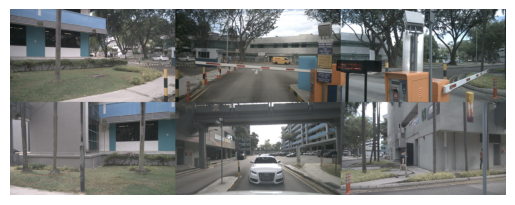

In [28]:
import matplotlib.pyplot as plt

img = combine_images(get_multiview_image_paths(nuscenes_dataset, "5e4e25f87ec84942ac459a55fe064330"))
plt.imshow(img)
plt.axis('off') 
plt.show()